<h1><div ;="" align="center">
                 <big style="color: rgb(100, 150, 200);">Ensino de Engenharia Química com Python</big></div>
</h1>
<table align="center">
<tbody>
<tr>
      <td width="300" align="center">
                                    <h1><a href="http://virtualabs.tecnico.ulisboa.pt/virtual/index.html">Virtualabs</a>
                                    </h1></td>
      <td width="100" align="center"><br></td>
      <td width="400" align="center">
              <big style="color: rgb(91, 179, 229);"><h1>Python</h1></big></td>
</tr>
<tr>
      <td align="center">
             <a href="http://custodians.online/portuguese.html">En solidaridad con Library Genesis y Sci-Hub</a>
                                </td>
      <td><br></td>
      <td align="center">SAGE e Python em Engenharia Químicas</td>
</tr>
<tr>
      <td align="center">
            <a href="https://gamafreire.github.io">VIRTUAis LABoratoriaiS no GitHub</a></td>
       <td><br></td>
      <td align="center">Python em português</td></tr>
<tr>
      <td width="10" align="center"></td>
      <td align="center"><a>
            <img style="border: 0px solid ;" alt="OpenSource" src="http://virtualabs.ist.utl.pt/osi_keyhole.png" align="middle"></a></td>
        <td align="center">Incrementar o uso de OpenSource no ensino
             <a><img style="border: 0px solid ;" alt="Python" src="http://virtualabs.ist.utl.pt/python-logo_4.png" align="middle"></a>
</td></tr>
</tbody>
</table>
                    
<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">
        <p></p>
        <hr style="border: 0pt none ; background-color: rgb(83, 79, 154); height: 5px;">
    </div>
                    
## ERKin

Como confirmar a resolução dos, quase todos, problemas de cinética química de disciplinas como engenharia das reacções ou química-fisíca?

Calculam-se, de forma muito simples para o utilizador, k, n e Co ou ko e Ea de dados cinéticos.

Estas pequenas funções permitem assim resolver a maioria dos problemas de determinação de parâmetros a partir de ensaios em descontínuo.

**ERKin** contem duas funções:
- cinetica  - determina Co, k e n
- ERA - determina ko e Ea


#### Limitações

- **cinetica**                

Os dados (método diferencial ou integral) têm de ser duas listas, uma de concentrações ou conversão obtidos num reactor descontínuo (batch) a temperatura constante e a outra, uma lista com os tempos correspondentes.

A lei de velocidade da reacção tem de ser da forma

$$\Re=kC^n$$

que integrada é ajustada, sem linearização, em ordem a k, Co e n.

Se os dados forem de concentração de produto, têm de ser postos em termos de concentração de reagente.

    
- **ERA**

Os dados têm de ser duas listas. Uma com as temperaturas (ºC ou K) e a outra as constantes de velocidade correspondentes.

Trata-se de ajustar, sem linearizar, a **equação de Arrhenius** aos dados $$ k=ko\ e^{-\dfrac{Ea}{RT}}$$


Tem de fornecer pelo menos 2 constantes em função da temperatura em ºC. Se estiverem em K é só ver exemplo abaixo.

                    
<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">
        <p></p>
        <hr style="border: 0pt none ; background-color: rgb(83, 79, 154); height: 5px;">
    <a href="./cine.html"> Voltar ao início</a></div>
    
### 1 - Instalação

Fazer download do ficheiro <a href="./erkin.py" download=" erkin.py">erkin.py</a> (v2.0, separador decimal com vírgulas em vez de ponto) e movê-lo para o sítio dos seus cálculos.

Claro que precisa ter instalados os pacotes matplotlib e scipy

### 2 - Testes

Se copiar o ficheiro erkin para uma célula em Jupyter e mandar executar deve obter o mesmo resultado que:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

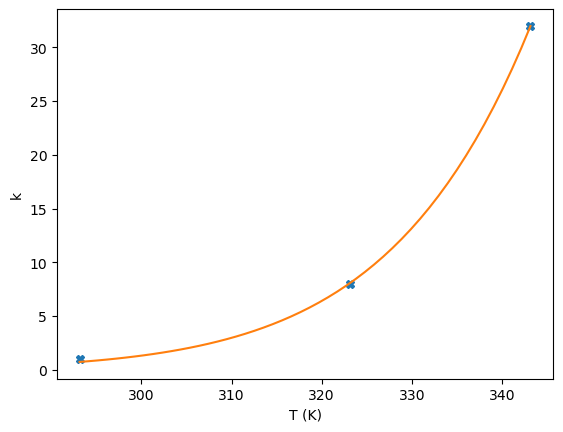

In [1]:
from erkin import cinetica, ERA

#    Teste de cinetica
X=[0, 10, 20, 40]
Y=[1000, 500, 333, 200]
fit, erros = cinetica(X,Y)

#    Teste de ERA
X=[20, 70, 50]
Y=[1, 32, 8]
fit, erros = ERA(X,Y, grafico=True)

## Cinetica


### 3 - 1º Exemplo

Numa folha de Jupyter faça o seguinte teste de tempo vs. concentração.

In [2]:
from erkin import cinetica

t = [0,50,100,150,200,250]
C = [2.50,1.26,0.630,0.316,0.159,0.0798]

Ans= cinetica(t, C)   

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Pode experimentar num script sem ser em Jupyter, mas o resultado não fica visível, embora a resposta esteja contida na variável Ans.
### 4 - 2º Exemplo

Teste de tempo vs. conversão com apresentação do gráfico do ajuste.

Notar que todos os dados disponibilizados pelo scipy.optimize.least_squares estão disponíveis.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

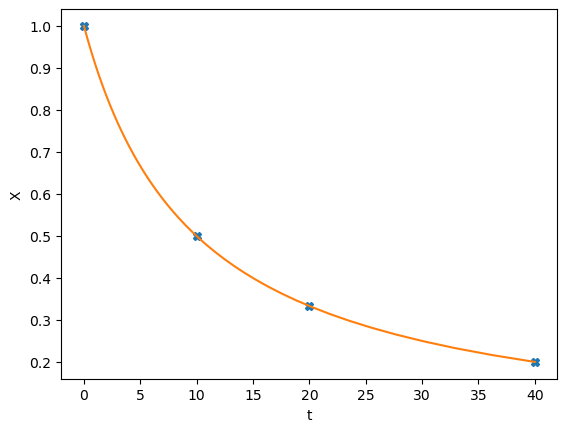

In [3]:
t = [0, 10, 20, 40]
Y = [1000, 500, 333, 200]
X = [1-i/Y[0] for i in Y]    # cálculo da conversão.

Ans = cinetica(t, X, conversao = True, grafico = True)

In [4]:
Ans

( active_mask: array([0, 0, 0])
         cost: 0.00017771857266617308
          fun: array([-0.00442202,  0.01377301, -0.01183324,  0.00248225])
         grad: array([ 2.05107353e-09, -5.18756954e-10, -1.82163265e-09])
          jac: array([[ 4.40948704e-02,  9.66196711e-07, -9.96279573e+00],
        [ 9.95791417e+01, -3.85694205e+00, -9.96279564e+00],
        [ 1.99550959e+02, -1.29817082e+01, -9.96279552e+00],
        [ 3.98841173e+02, -4.04849802e+01, -9.96279600e+00]])
      message: '`gtol` termination condition is satisfied.'
         nfev: 6
         njev: 6
   optimality: 1.8216326502784597e-09
       status: 1
      success: True
            x: array([0.10028431, 2.0026347 , 1.00044366]),
 array([0.00030052, 0.0028018 , 0.00184051]))

### 5 - 3º Exemplo

Teste de tempo vs. concnetração de produto da reacção $2A\to B$.

Problema resolvido tradicionalmente em 
http://virtualabs.tecnico.ulisboa.pt/ERI/cinetica/python/AnaliseIntegral.html

A reacção  2A→B
  em fase líquida ocorre num reactor batch isotérmico. O número inicial de moles de A  nAo=8 mol
 .
Dados: nº de moles de B em função do tempo.

In [5]:
nAo=8
t=[0,30,81,124,178,240,299,450,690]      # (s)
nB=[0,0.24,0.6,0.88,1.2,1.52,1.8,2.4,3]  # (mol)
C=[nAo-2*i for i in nB]
Ans = cinetica(t, C)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
from erkin import cinetica
t=[0, 10, 20, 30]
C=[2.1, 1, 0.5, 0.25]
ans=cinetica(t,C)
type(t)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

list

### 6  - Help

In [7]:
cinetica?

<span style="color: #ff1630;">Signature:</span> cinetica(X, Y, conversao=False, grafico=False)

<span style="color: #ff1630;">Docstring:</span>

X - lista de tempos

Y - lista de concentrações

se conversão = True, Y é uma lista de conversões

Devolve k, n, Co e os erros associados

Se conversao = True, devolve n e kCAo^{n-1}


V0.9<span style="color: #ff1630;">©FGF2022</span>

<span style="color: #ff1630;">File:</span>      erkin.py

<span style="color: #ff1630;">Type:</span>      function

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">
        <p></p>
        <hr style="border: 0pt none ; background-color: rgb(83, 79, 154); height: 5px;">
        <a href="./cine.html"> Voltar ao início</a>

## ERA

A instalação e o teste foram feitos atrás

### 7 - Exemplo

Numa folha de Jupyter faça o seguinte teste de k's em função de temperaturas em ºC

<IPython.core.display.Math object>

<IPython.core.display.Math object>

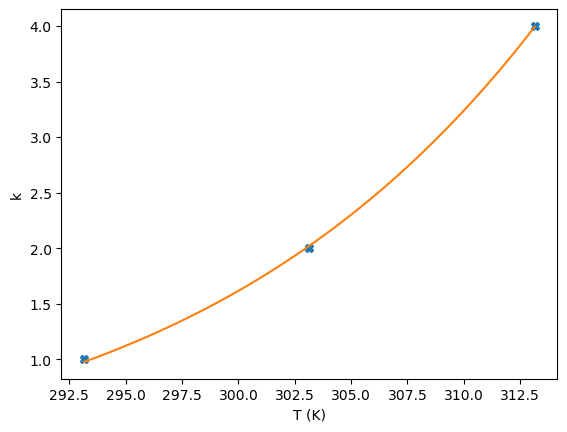

In [8]:
from erkin import ERA

X=[20, 30, 40]
Y=[1, 2, 4]
fit, erros = ERA(X,Y, grafico=True)

### 8 - Exemplo

Numa folha de Jupyter faça o seguinte teste de k's em função de temperaturas em K

In [9]:
from erkin import ERA

X=[293.15, 343.15, 323.15]
Y=[1, 32, 8]

Ans= ERA(X, Y, Kelvin = True)  

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 9  - Help

In [10]:
ERA?

<span style="color: #ff1630;">Signature:</span> ERA(X, Y, Kelvin=False, grafico=False)

<span style="color: #ff1630;">Docstring:</span>

X - lista de temperaturas (ºC)

Y - lista de constantes de velocidade


Se Kelvin = True X está em K.


Devolve ko e Ea e os erros associados

Se Kelvin != True, em primeiro lugar as temperaturas em ºC são transformadas em K


V0.9<span style="color: #ff1630;">©FGF2022</span>

<span style="color: #ff1630;">File:</span>      erkin.py

<span style="color: #ff1630;">Type:</span>      function

<div class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput " data-mime-type="text/markdown">
        <p></p>
        <hr style="border: 0pt none ; background-color: rgb(83, 79, 154); height: 5px;">
        <a href="http://reactor.ist.utl.pt/python/cine.html"> Voltar ao início</a>